## Classification Analysis

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import joblib

sns.set_style('dark')
sns.set(font_scale=2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings; warnings.filterwarnings('ignore')

pd.set_option('display.float_format','{:.2f}'.format)

In [12]:
train = pd.read_csv("HR_train.csv")
validate = pd.read_csv("HR_test.csv")

In [4]:
X = train.drop(["left"], axis=1)
y = train["left"]

In [13]:
X_val = validate.drop(["left"], axis=1)
y_val = validate["left"]

## Classification with XGBoost classifier

In [5]:
model = xgb.XGBClassifier(objective='binary:logistic')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

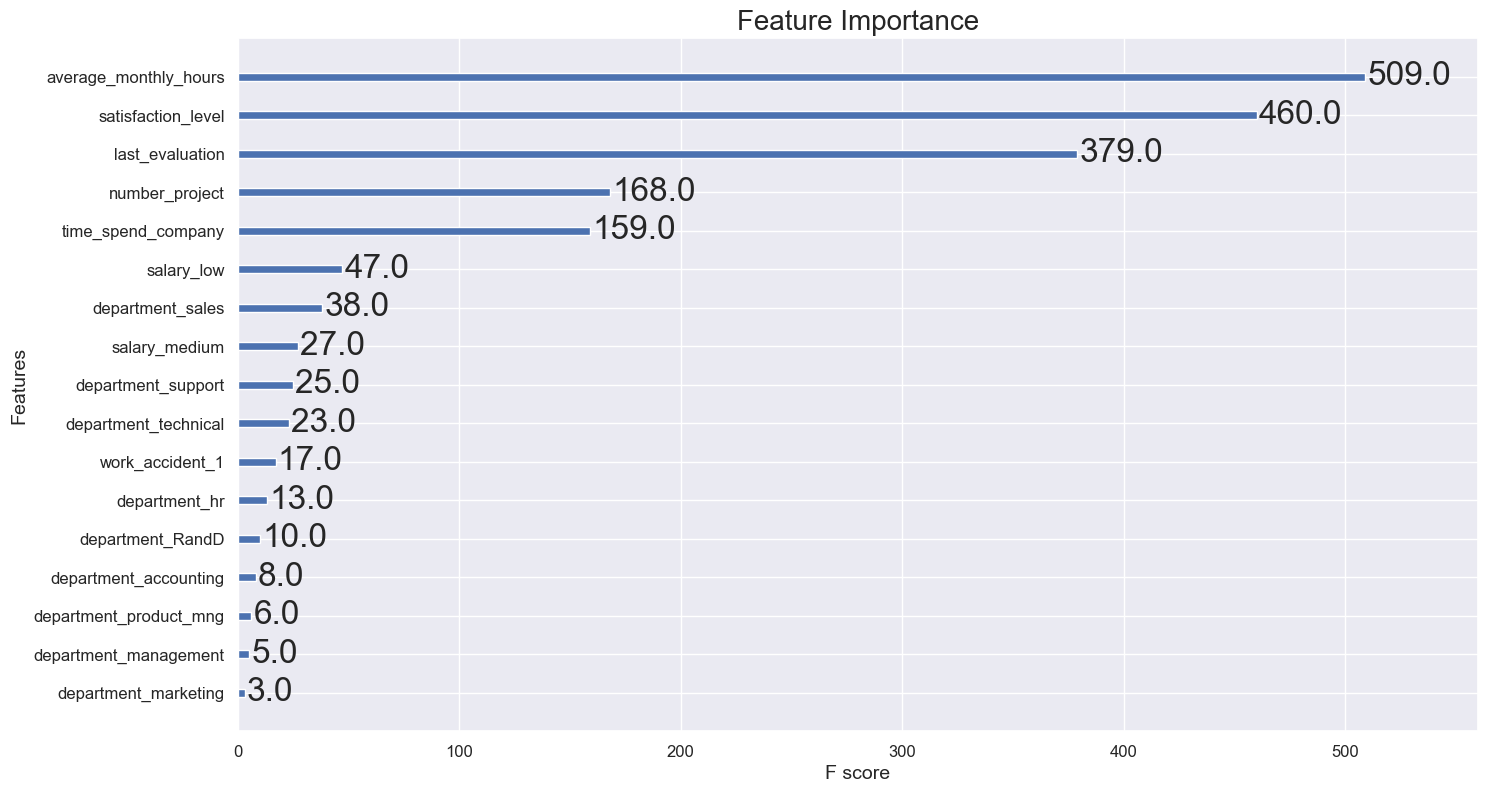

In [8]:
# Feature Importance
plt.figure(figsize=(16,9))
xgb.plot_importance(model, ax=plt.gca())
plt.title("Feature Importance", fontsize=20)
plt.show()

In [14]:
y_pred_val = model.predict(X_val)

In [15]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



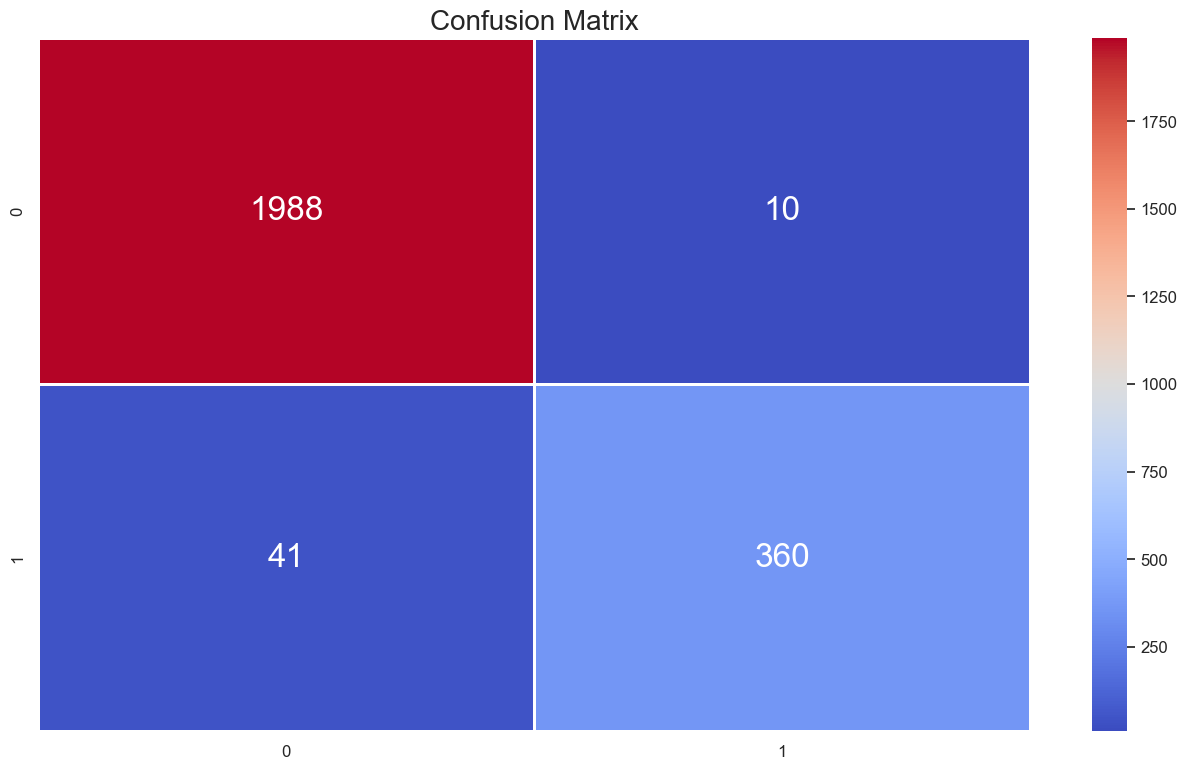

In [16]:
# Confusion Matrix
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='.0f', linewidths=2)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Save XGBoost classifier model

In [48]:
joblib.dump(model, 'Web_ing/model.joblib')

['Web_ing/model.joblib']